# Project: Unlocking YouTube Channel PerformanceSecrets Analysis

 This project aims to analyze YouTube channel performance by leveraging extensive
 metrics and using Machine Learning techniques to uncover patterns, trends, and
 actionable insights. We'll focus on Exploratory Data Analysis (EDA), data
 visualization, and developing a predictive model to estimate revenue or
 subscribers based on the provided dataset.

###  Step-by-Step Workflow


1. Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

2. Load and explore the dataset

In [6]:
from google.colab import files
uploaded = files.upload()

Saving youtube_channel_real_performance_analytics.csv to youtube_channel_real_performance_analytics.csv


In [24]:
#loading the dataset
df = pd.read_csv('youtube_channel_real_performance_analytics.csv')

In [26]:
df.shape

(364, 70)

In [11]:
#  Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [20]:
# Checking for the nulls
df.isnull().sum()

,0
ID,0
Video Duration,0
Video Publish Time,0
Days Since Publish,0
Day,0
...,...
Watch Time (hours),0
Subscribers,0
Estimated Revenue (USD),0
Impressions,0


In [15]:
# Preview the dataset
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Now show the first 5 rows with all columns
df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),Ad Impressions,Estimated AdSense Revenue (USD),DoubleClick Revenue (USD),YouTube Ads Revenue (USD),Watch Page Ads Revenue (USD),YouTube Premium (USD),Transaction Revenue (USD),Transactions,Revenue from Transactions (USD),Reactions,Chat Messages Count,Reminders Set,Stream Hours,Remix Views,Remix Count,Subscribers from Posts,New Comments,Shares,Like Rate (%),Dislikes,Likes,Unsubscribes,New Subscribers,Returned Items (USD),Unconfirmed Commissions (USD),Approved Commissions (USD),Orders,Total Sales Volume (USD),End Screen Click-Through Rate (%),End Screen Impressions,End Screen Clicks,Teaser Click-Through Rate (%),Teaser Impressions,Teaser Clicks,Card Click-Through Rate (%),Card Impressions,Card Clicks,Views per Playlist Start,Playlist Views,Playlist Watch Time (hours),Clip Watch Time (hours),Clip Views,YouTube Premium Watch Time (hours),YouTube Premium Views,Returning Viewers,New Viewers,Average Views per User,Unique Viewers,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,1.386,1.021,981.0,0.527,0.024,1.002,0.551,0.010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,12.0,96.86,30.0,924.0,3.0,54.0,0.0,0.0,0.0,0.0,0.0,4.35,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3333,10.0,0.2974,0.1575,10.0,2.5358,152.0,0.0,0.0,0.0,0.0,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,1.612,1.361,861.0,0.635,0.009,1.172,0.645,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,5.0,94.71,18.0,322.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5000,7.0,0.5187,0.0000,0.0,0.8911,32.0,0.0,0.0,0.0,0.0,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,2.105,1.818,88.0,0.088,0.000,0.160,0.088,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,92.28,20.0,239.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,11.0,0.1683,0.0000,0.0,0.1838,28.0,0.0,0.0,0.0,0.0,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,1.667,0.857,35.0,0.016,0.000,0.030,0.016,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,7.0,94.02,14.0,220.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6667,20.0,0.0640,0.0000,0.0,0.0711,20.0,0.0,0.0,0.0,0.0,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,7.0,76.98,180.0,602.0,3.0,31.0,0.0,0.0,0.0,0.0,0.0,0.00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6667,10.0,0.0611,0.0000,0.0,0.2519,39.0,0.0,0.0,0.0,0.0,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


3.

3. Data Cleaning

Changing Data Types

In [36]:
# Column 'Video Publish Time' 's data type is object it should be DateTime
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])

Handle Missing Values

In [27]:
# Fill or Drop null values even though we know that there aren't any
df.dropna(inplace=True) # Drop rows with mussing values (for simplicity)

In [28]:
df.shape

(364, 70)

Exploratory Data Analysis (EDA)

Analyze relationships:

In [32]:
df.columns

Index(['ID', 'Video Duration', 'Video Publish Time', 'Days Since Publish',
       'Day', 'Month', 'Year', 'Day of Week', 'Revenue per 1000 Views (USD)',
       'Monetized Playbacks (Estimate)', 'Playback-Based CPM (USD)',
       'CPM (USD)', 'Ad Impressions', 'Estimated AdSense Revenue (USD)',
       'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)',
       'Watch Page Ads Revenue (USD)', 'YouTube Premium (USD)',
       'Transaction Revenue (USD)', 'Transactions',
       'Revenue from Transactions (USD)', 'Reactions', 'Chat Messages Count',
       'Reminders Set', 'Stream Hours', 'Remix Views', 'Remix Count',
       'Subscribers from Posts', 'New Comments', 'Shares', 'Like Rate (%)',
       'Dislikes', 'Likes', 'Unsubscribes', 'New Subscribers',
       'Returned Items (USD)', 'Unconfirmed Commissions (USD)',
       'Approved Commissions (USD)', 'Orders', 'Total Sales Volume (USD)',
       'End Screen Click-Through Rate (%)', 'End Screen Impressions',
       'End Screen Clicks', 

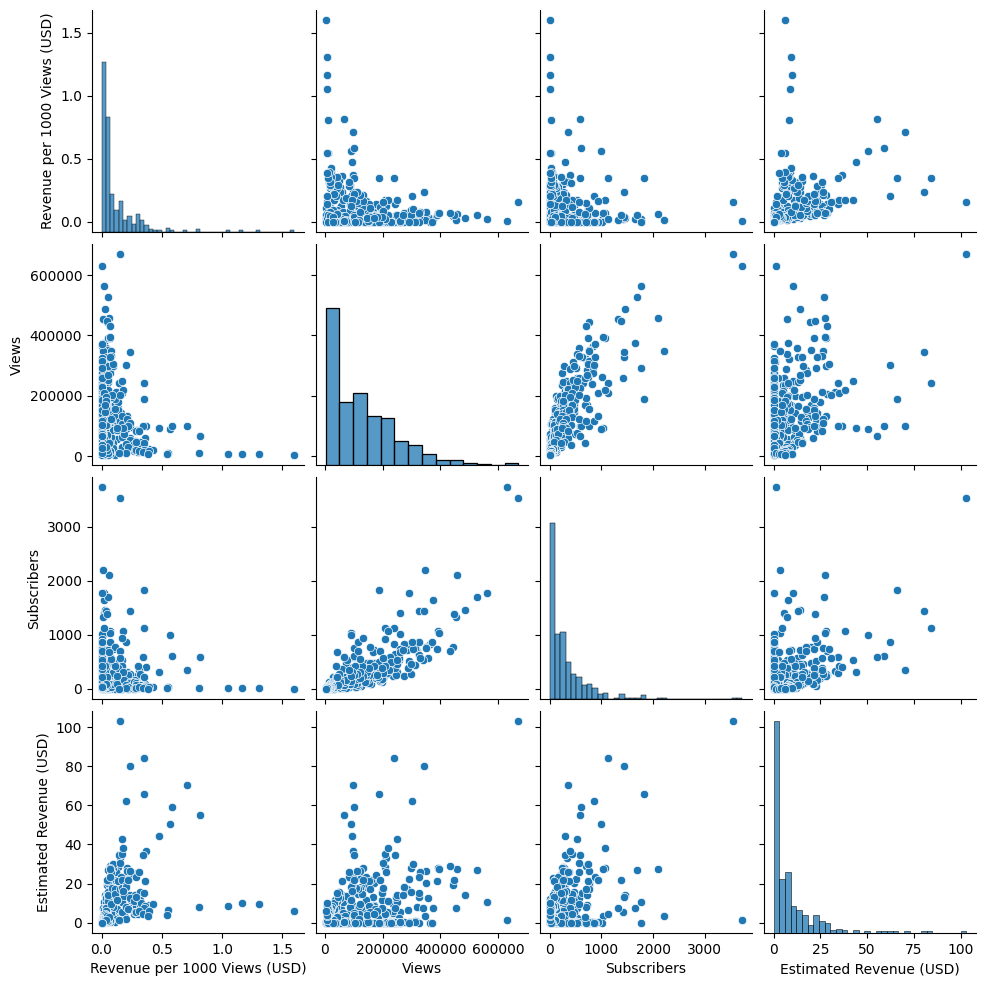

In [33]:
# pairplot to visualize relationships
sns.pairplot(df[['Revenue per 1000 Views (USD)', 'Views', 'Subscribers', 'Estimated Revenue (USD)']])
plt.show()

Correlation Heatmap

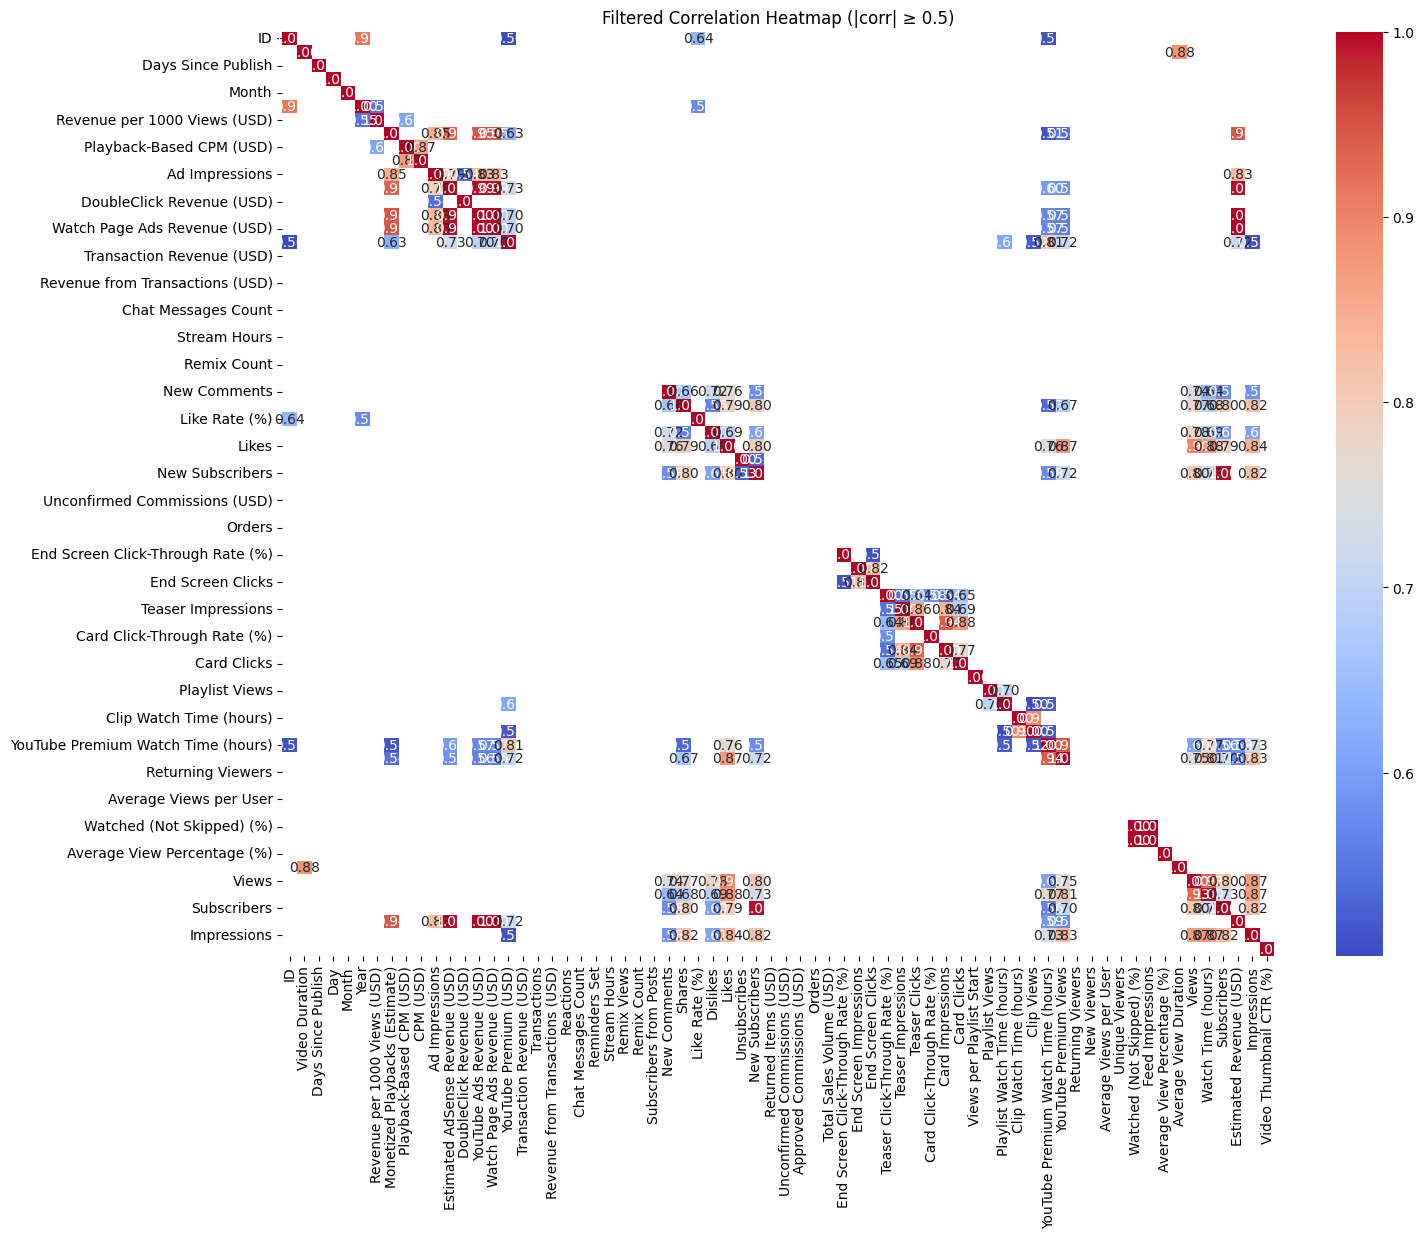

In [46]:
plt.figure(figsize=(16, 12))

# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Step 2: Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Mask correlations with absolute value < 0.5
mask = np.abs(corr_matrix) < 0.5

# Step 4: Plot heatmap using the correlation matrix and mask
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title("Filtered Correlation Heatmap (|corr| ≥ 0.5)")
plt.show()


Top Performers by Revenue

In [47]:
top_videos = df.sort_values(by= 'Estimated Revenue (USD)', ascending=False).head(10)
print(top_videos[['ID', 'Estimated Revenue (USD)', 'Views', 'Subscribers']])

      ID  Estimated Revenue (USD)     Views  Subscribers
228  228                  103.117  670990.0       3538.0
257  257                   83.979  241060.0       1125.0
251  251                   80.265  343319.0       1437.0
289  289                   70.247   99196.0        350.0
278  278                   65.978  188324.0       1824.0
260  260                   62.047  302999.0        866.0
293  293                   59.058  101025.0        602.0
294  294                   55.040   67556.0        581.0
290  290                   50.344   89284.0        995.0
284  284                   44.228   93487.0        305.0


5. Feature Engineering

Create New Features

In [48]:
# Create Revenue per view
df['Revenue per 1000 Views (USD)']= df['Estimated Revenue (USD)']/df['Views'] * 100

In [50]:
# Create Engagement Rate
df['Engagement Rate'] = (df['Likes'] +  df['Shares'] + df['New Comments'] / df['Views'] * 100 )

6. Data Visualization

Revenue Distribution

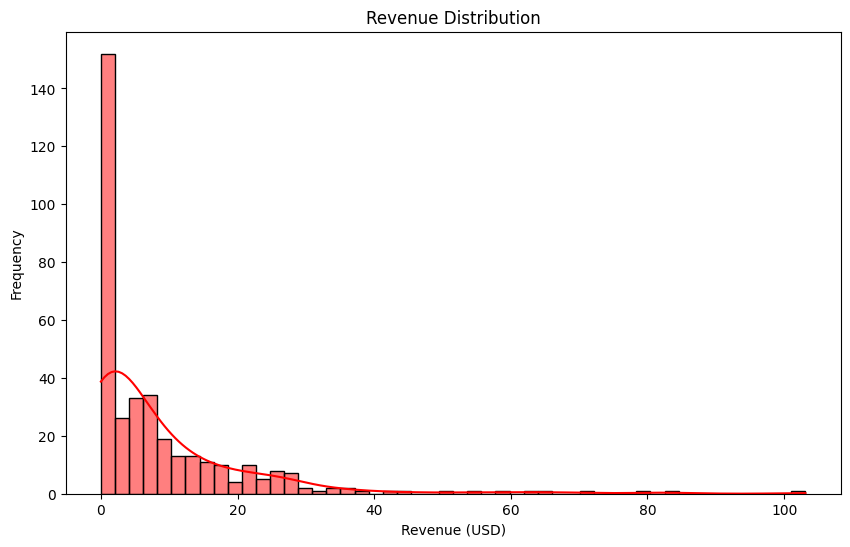

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Revenue (USD)'], bins=50, kde=True, color='red')
plt.title('Revenue Distribution')
plt.xlabel('Revenue (USD)')
plt.ylabel('Frequency')
plt.show()

Revenue vs Views

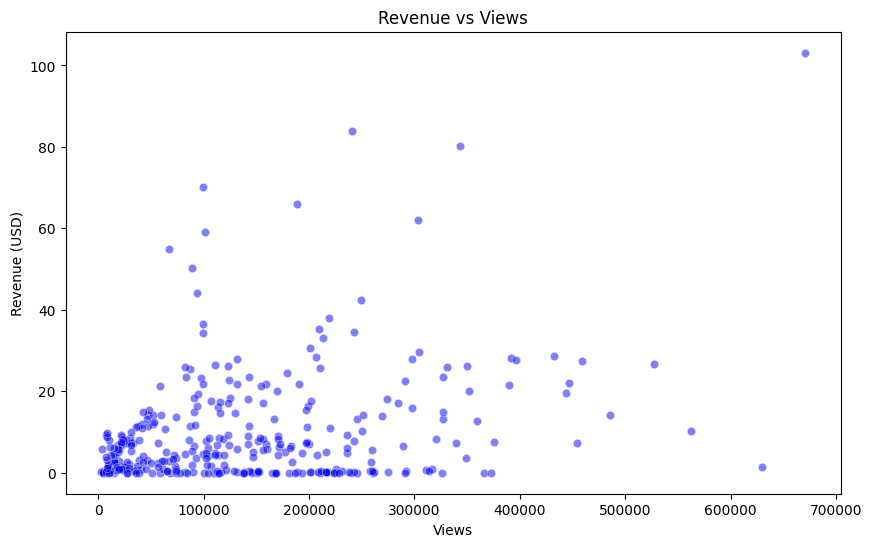

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Views', y='Estimated Revenue (USD)', data=df, color='blue', alpha=0.5)
plt.title('Revenue vs Views')
plt.xlabel('Views')
plt.ylabel('Revenue (USD)')
plt.show()


7. Predective Model

Predict data

In [62]:
# Select features and target
features = ['Views', 'Subscribers', 'Likes', 'Shares', 'New Comments', 'Engagement Rate']
target = 'Estimated Revenue (USD)'

X=df[features]
Y=df[target]

#Split the data
X_train, X_test, y_train, y_test, = train_test_split(X, Y, test_size=0.2, random_state=42)


Train Random Forest Regressor

In [63]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

Evaluate the Model:

In [64]:
# Calculae Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R_squared: {r2:.2f}')

Mean Squared Error: 89.85279942584795
R_squared: -0.03


<Axes: xlabel='Estimated Revenue (USD)'>

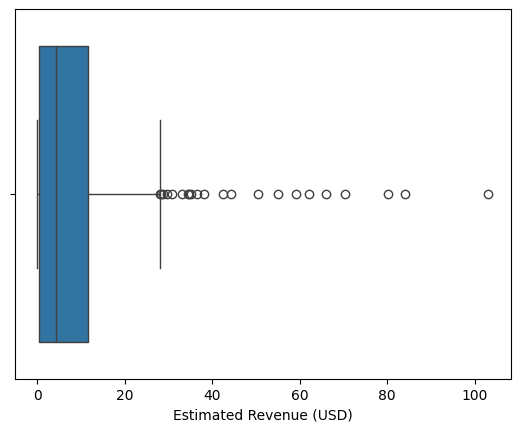

In [65]:
sns.boxplot(x=df['Estimated Revenue (USD)'])

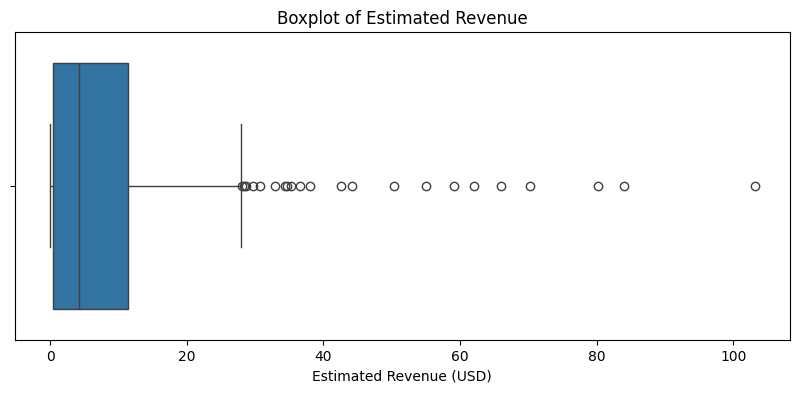

In [68]:

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Estimated Revenue (USD)'])
plt.title("Boxplot of Estimated Revenue")
plt.show()


In [69]:
Q1 = df['Estimated Revenue (USD)'].quantile(0.25)
Q3 = df['Estimated Revenue (USD)'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[(df['Estimated Revenue (USD)'] >= Q1 - 1.5 * IQR) & (df['Estimated Revenue (USD)'] <= Q3 + 1.5 * IQR)]


In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 42.807881328678256
R²: 0.2161566207601725


Adding 3 new features

In [72]:
df = df.copy()

df['Revenue_per_view'] = df['Estimated Revenue (USD)'] / (df['Views'] + 1)
df['Like_View_Ratio'] = df['Likes'] / (df['Views'] + 1)
df['Engagement'] = df[['Likes', 'Shares', 'New Comments']].sum(axis=1)


In [73]:
# Updating features list
features = ['Views', 'Subscribers', 'Likes', 'Shares', 'New Comments', 'Engagement Rate', 'Revenue_per_view', 'Like_View_Ratio', 'Engagement']

In [74]:
X = df[features]
y = df['Estimated Revenue (USD)']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2:.3f}')


MSE: 3.84174903233768
R²: 0.930


This is a good score now to move forward

8. Insights and Recommendations

Using visualizations and feature importance to derive insights

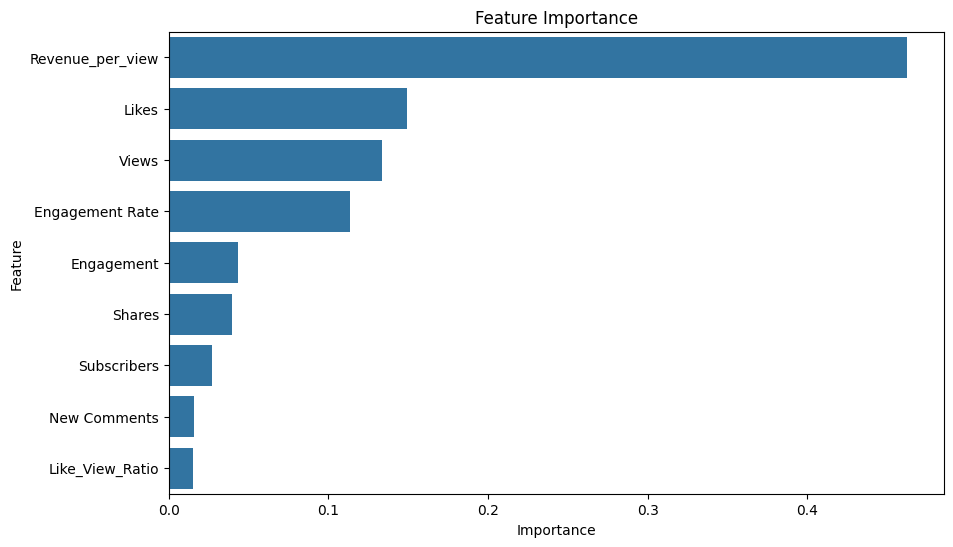

In [75]:
# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

9. Deployement and Presentation

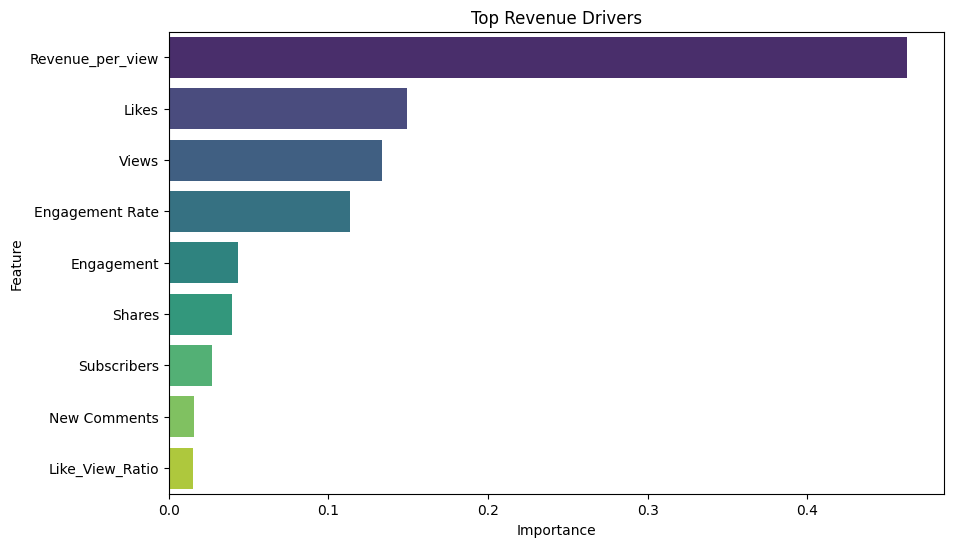

In [78]:

# Get feature importance
feature_importance = model.feature_importances_
features = X.columns

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', hue='Feature', dodge=False, palette='viridis', legend=False)
plt.title('Top Revenue Drivers')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Summarized Findings
*   Views are the top revenue drivers followed by likes and overall engagement.





In [82]:
df.columns

Index(['ID', 'Video Duration', 'Video Publish Time', 'Days Since Publish',
       'Day', 'Month', 'Year', 'Day of Week', 'Revenue per 1000 Views (USD)',
       'Monetized Playbacks (Estimate)', 'Playback-Based CPM (USD)',
       'CPM (USD)', 'Ad Impressions', 'Estimated AdSense Revenue (USD)',
       'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)',
       'Watch Page Ads Revenue (USD)', 'YouTube Premium (USD)',
       'Transaction Revenue (USD)', 'Transactions',
       'Revenue from Transactions (USD)', 'Reactions', 'Chat Messages Count',
       'Reminders Set', 'Stream Hours', 'Remix Views', 'Remix Count',
       'Subscribers from Posts', 'New Comments', 'Shares', 'Like Rate (%)',
       'Dislikes', 'Likes', 'Unsubscribes', 'New Subscribers',
       'Returned Items (USD)', 'Unconfirmed Commissions (USD)',
       'Approved Commissions (USD)', 'Orders', 'Total Sales Volume (USD)',
       'End Screen Click-Through Rate (%)', 'End Screen Impressions',
       'End Screen Clicks', 

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

def identify_underperformers(df, cpm_col='CPM (USD)', engagement_col='Engagement Rate', revenue_col='Estimated Revenue (USD)'):
    # Calculate thresholds (you can tweak the quantile value if needed)
    low_cpm_thresh = df[cpm_col].quantile(0.25)
    low_engage_thresh = df[engagement_col].quantile(0.25)

    print(f"Low CPM threshold: {low_cpm_thresh:.2f}")
    print(f"Low Engagement threshold: {low_engage_thresh:.2f}")

    # Filter
    low_cpm_df = df[df[cpm_col] <= low_cpm_thresh]
    low_engage_df = df[df[engagement_col] <= low_engage_thresh]
    underperformers = df[
        (df[cpm_col] <= low_cpm_thresh) &
        (df[engagement_col] <= low_engage_thresh)
    ]

    # Summary counts
    print(f"\n🔻 Videos with Low CPM: {len(low_cpm_df)}")
    print(f"🔻 Videos with Low Engagement: {len(low_engage_df)}")
    print(f"❗ Videos underperforming in both: {len(underperformers)}")

    # Plot: Revenue distribution of underperformers vs others
    df['Underperformer'] = df.index.isin(underperformers.index)
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Underperformer', y=revenue_col, hue= 'Underperformer',  palette='Set2')
    plt.title('Revenue Comparison: Underperformers vs Others')
    plt.xlabel('Underperformer (Low CPM & Engagement)')
    plt.ylabel(revenue_col)
    plt.show()

    # Clean up temporary column
    df.drop(columns=['Underperformer'], inplace=True)

    return underperformers[['ID', cpm_col, engagement_col, revenue_col]].sort_values(by=revenue_col)


Low CPM threshold: 0.51
Low Engagement threshold: 1102.84

🔻 Videos with Low CPM: 86
🔻 Videos with Low Engagement: 86
❗ Videos underperforming in both: 17


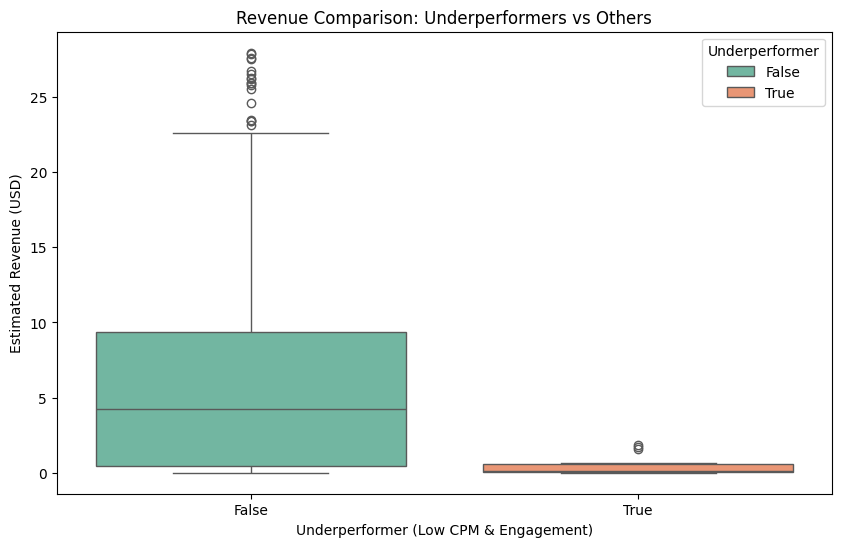

,ID,CPM (USD),Engagement Rate,Estimated Revenue (USD)
4,4,0.000,609.341087,0.000
11,11,0.000,1100.355559,0.000
93,93,0.000,903.024725,0.000
6,6,0.093,165.369515,0.003
8,8,0.451,262.451881,0.051


In [86]:
underperforming_videos = identify_underperformers(df)
underperforming_videos.head()

Export model:

In [87]:
import joblib
joblib.dump(model, 'youtube_revenue_predictor.pkl')

['youtube_revenue_predictor.pkl']

# Project Summary

This project aims to analyze and predict YouTube video performance, focusing on key metrics such as revenue, views, engagement, and other performance indicators. By leveraging data analytics and machine learning techniques, we have identified significant patterns and relationships between different features and the estimated revenue generated by videos.

The analysis involved:
- **Exploratory Data Analysis (EDA)** to understand the structure of the dataset, identify outliers, and visualize key distributions.
- **Feature Engineering** to create new metrics such as revenue per view, engagement rate, and like-to-view ratio, enhancing the model’s predictive capabilities.
- **Model Development** using a Random Forest Regressor, optimizing for accuracy and performance.
- **Model Evaluation** using performance metrics like Mean Squared Error (MSE) and R-squared to assess model effectiveness and identify areas for improvement.

Additionally, I explored potential underperforming areas, identifying videos with low CPM and low engagement, and compared their revenue performance against others. The findings provide valuable insights into how various factors influence YouTube video revenue.

Finally, the trained model was exported using `joblib`, making it portable and easy to load for future predictions on new datasets, providing a streamlined process for forecasting revenue based on video performance data.

This project demonstrates the power of data analytics and machine learning to derive actionable insights from large datasets, aiding in the optimization of content strategy and monetization efforts on platforms like YouTube.


In [89]:
# Trying the model



# Load the model
loaded_model = joblib.load('youtube_revenue_predictor.pkl')

# New data for prediction (must match the features used during training)
# features = ['Views', 'Subscribers', 'Likes', 'Shares', 'New Comments', 'Engagement Rate', 'Revenue_per_view', 'Like_View_Ratio', 'Engagement']
new_data = pd.DataFrame({
    'Views': [1000, 2000],
    'Subscribers': [500, 700],
    'Likes': [50, 80],
    'Shares': [30, 40],
    'New Comments': [20, 30],
    'Engagement Rate': [0.5, 0.6],
    'Revenue_per_view': [0.5, 0.6],
    'Like_View_Ratio': [0.5, 0.6],
    'Engagement': [50, 60]
})

# Predict using the loaded model
predictions = loaded_model.predict(new_data)

# Output the predictions
print(predictions)



[7.2455  6.34859]


Downloading the model

In [90]:
from google.colab import files
files.download('youtube_revenue_predictor.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>